#Cargar Datos

In [1]:
from google.colab import files
datos = files.upload()


Saving Salary_Data.csv to Salary_Data.csv


#Importamos Datos

In [28]:
import io
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

datos_Salary = pd.read_csv(io.BytesIO(datos["Salary_Data.csv"]))
datos_Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
datos_Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#Verificamos los datos

In [30]:
datos_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#Verificamos si hay datos nulos 

In [31]:
datos_Salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

sin datos nulos, todo limpio

#Graficamos

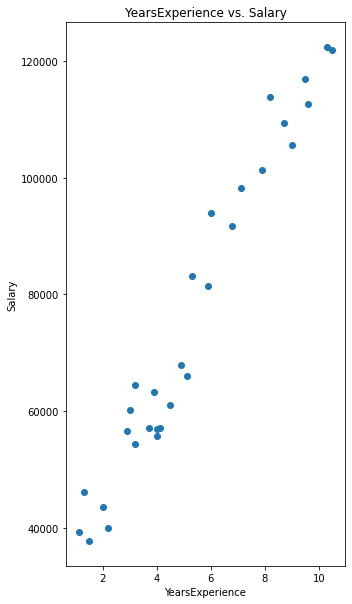

In [32]:
plt.subplots(figsize=(5, 10))
plt.scatter(x=datos_Salary['YearsExperience'],y=datos_Salary['Salary'])
plt.title('YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

#Separamos Datos

In [33]:
x_train = datos_Salary.sample(frac=0.8, random_state=42)
x_test = datos_Salary.drop(x_train.index)
y_train = x_train.pop('Salary')
y_test = x_test.pop('Salary')

#Modelo de regresion lineal 

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
pred = lr.predict(x_test)

error = np.sqrt(mean_squared_error(y_test, pred))
print('Error porcentual: %f' % (error*100) )

print("Score predict train", r2_score(y_train, lr.predict(x_train)))
print("Score predict test", r2_score(y_test, lr.predict(x_test)))

Error porcentual: 627104.824089
Score predict train 0.9647289754601945
Score predict test 0.8433355166157543


#conclusion 

Un modelo optimo de clasificación es el modelo de regresion lineal, el cual obtuvo un porcentaje de acierto del 84.3%, que es muy bajo 